In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("fashion-mnist_train.csv",)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
# Classes
# The dataset has 10 classes, each corresponding to a different type of clothing item:

# T-shirt/top
# Trouser
# Pullover
# Dress
# Coat
# Sandal
# Shirt
# Sneaker
# Bag
# Ankle boot

# Data Format
# Training set: 60,000 images
# Test set: 10,000 images
# Image size: 28x28 pixels
# Image type: Grayscale (pixel values range from 0 to 255)

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


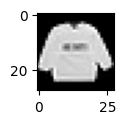

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(train_data.iloc[0,1:].values.reshape(28,28),cmap="grey")
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(units =400 , activation ='relu',input_dim = 784,name = "Dense"))
model.add(Dense(units =100 , activation ='relu',name = "Layer1"))
model.add(Dense(units =10 , activation ='softmax',name = "Output"))
model.summary()

C:\Users\vaishnavi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense (Dense)                        │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer1 (Dense)                       │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,110 (1.35 MB)

 Trainable params: 355,110 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
len(model.weights)

6

In [9]:
print(model.weights[0].shape) # 1st  layer weights
print(model.weights[1].shape )#bias
print(model.weights[2].shape )# 2nd  layer weights
print(model.weights[3].shape) #bias

(784, 400)
(400,)
(400, 100)
(100,)


In [10]:
X = train_data.iloc[:,1:].values/255
y = train_data.iloc[:,0].values
print(X.shape,y.shape)

(60000, 784) (60000,)


In [11]:
#training model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
model.fit(X,y,batch_size = 64,epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7748 - loss: 0.6384
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8649 - loss: 0.3734
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8798 - loss: 0.3285
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8872 - loss: 0.3041
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8968 - loss: 0.2794
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8981 - loss: 0.2734
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9046 - loss: 0.2529
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9107 - loss: 0.2368
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9155 - loss: 0.2290
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9166 - loss: 0.2208
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9219 - loss: 0.2082
Epoch 12/20
938/938 ━━━━━━━━━━━━

In [12]:
test_data = pd.read_csv("fashion-mnist_test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values
yhat = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
yhat.shape

(10000, 10)

In [15]:
X_test.shape

(10000, 784)

In [16]:
ans = np.argmax(yhat,axis=1)
ans.shape

(10000,)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
print(accuracy_score(y_test,ans))

0.8729


In [ ]:
print(classification_report(y_test,ans))

In [ ]:
print(confusion_matrix(y_test,ans))

In [ ]:
#accuracy is 87.29%